<a href="https://colab.research.google.com/github/11471a0205/Stock_Prediction_Project/blob/main/RNN_and_Bi_Directional_RNN_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as apprcepd_pdsn

In [ ]:
apprcepdta = apprcepd_pdsn.read_csv("preprocessed_apple_stocks.csv")

In [ ]:
apprcepdta

,Date,Close/Last
0,2024-07-05,226.3400
1,2024-07-03,221.5500
2,2024-07-02,220.2700
3,2024-07-01,216.7500
4,2024-06-28,210.6200
...,...,...
2512,2014-07-11,23.8050
2513,2014-07-10,23.7587
2514,2014-07-09,23.8475
2515,2014-07-08,23.8375


In [ ]:
apprcepdta.shape

(2517, 2)

In [ ]:
import warnings as apprce_wgnisn
apprce_wgnisn.filterwarnings('ignore')
import numpy as apprcenmp

In [ ]:
def apprc_stkd(S, N):
  apprc_stkX = []
  apprc_stkY = []
  for f in range(len(S)):
    rest = f + N
    if rest > len(S)-1:
      break
    apprc_rstIp, apprc_rstOp = S[f:rest], S[rest]
    apprc_stkX.append(apprc_rstIp)
    apprc_stkY.append(apprc_rstOp)
  return apprcenmp.array(apprc_stkX), apprcenmp.array(apprc_stkY)

In [ ]:

N = 10
apprc_stkXt, apprc_stkYt = apprc_stkd(apprcepdta['Close/Last'][:-100].tolist(), N)

apprc_stkXs, apprc_stkYs = apprc_stkd(apprcepdta['Close/Last'][-100:].tolist(), N)
for m in range(len(apprc_stkXs)):
  print(apprc_stkXs[m], apprc_stkYs[m])

[29.6563 29.1175 29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125
 27.425 ] 27.2075
[29.1175 29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425
 27.2075] 27.2525
[29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075
 27.2525] 27.175
[28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525
 27.175 ] 27.215
[28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175
 27.215 ] 27.15
[28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215
 27.15  ] 27.35
[28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15
 27.35  ] 27.0
[28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15   27.35
 27.    ] 26.745
[27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15   27.35   27.
 26.745 ] 26.835
[27.425  27.2075 27.2525 27.175  27.215  27.15   27.35   27.     26.745
 26.835 ] 26.685
[27.2075 27.2525 27.175  27.215  27.15   27.35   27.     26.745  26.835
 26.685 ] 26.2775
[27.2525 27.175  27.215 

In [ ]:
#### real output with respective date
apprc_stkYs_LT= apprc_stkYs
Prec_Tessk_D =(apprcepdta['Date'][-100:-10].tolist())

In [ ]:
apprc_stkXt.shape

(2407, 10)

In [ ]:
apprc_stkXs.shape

(90, 10)

In [ ]:
apprc_stkXt = apprc_stkXt.reshape(apprc_stkXt.shape[0],apprc_stkXt.shape[1] , 1)
print("Training Data after Reshaped : ", apprc_stkXt.shape)

Training Data after Reshaped :  (2407, 10, 1)


In [ ]:
apprc_stkXs = apprc_stkXs.reshape(apprc_stkXs.shape[0],apprc_stkXs.shape[1] , 1)
print("Testing Data after Reshaped : ", apprc_stkXs.shape)

Testing Data after Reshaped :  (90, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential as apprcsqntl
from tensorflow.keras.layers import SimpleRNN as apprcsrecnunt
from tensorflow.keras.layers import Bidirectional as apprcdrbidectal
from tensorflow.keras.layers import Dense as apprcdse
from sklearn.metrics import mean_absolute_error as apprcmanse
from sklearn.metrics import mean_squared_error as apprcmansqr
from sklearn.metrics import r2_score as apprcr2scr
import math as apprcmth
import matplotlib.pyplot as apprcep_mplit

appr_actvnfct = 'relu'
apprce_lsfctn = 'mean_squared_error'

**RNN (Optimizers)**

In [ ]:
apprc_stkXt = apprc_stkXt.astype(apprcenmp.float32)
apprc_stkXs = apprc_stkXs.astype(apprcenmp.float32)
print(apprc_stkXt.shape)

(2407, 10, 1)


...............................................................................
              RNN using the Optimizer  adam
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9903.1543 
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 539.8943
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 157.9178
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.0441
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.2043
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.6563
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6098
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8744
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2446
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5566
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.1294
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss:

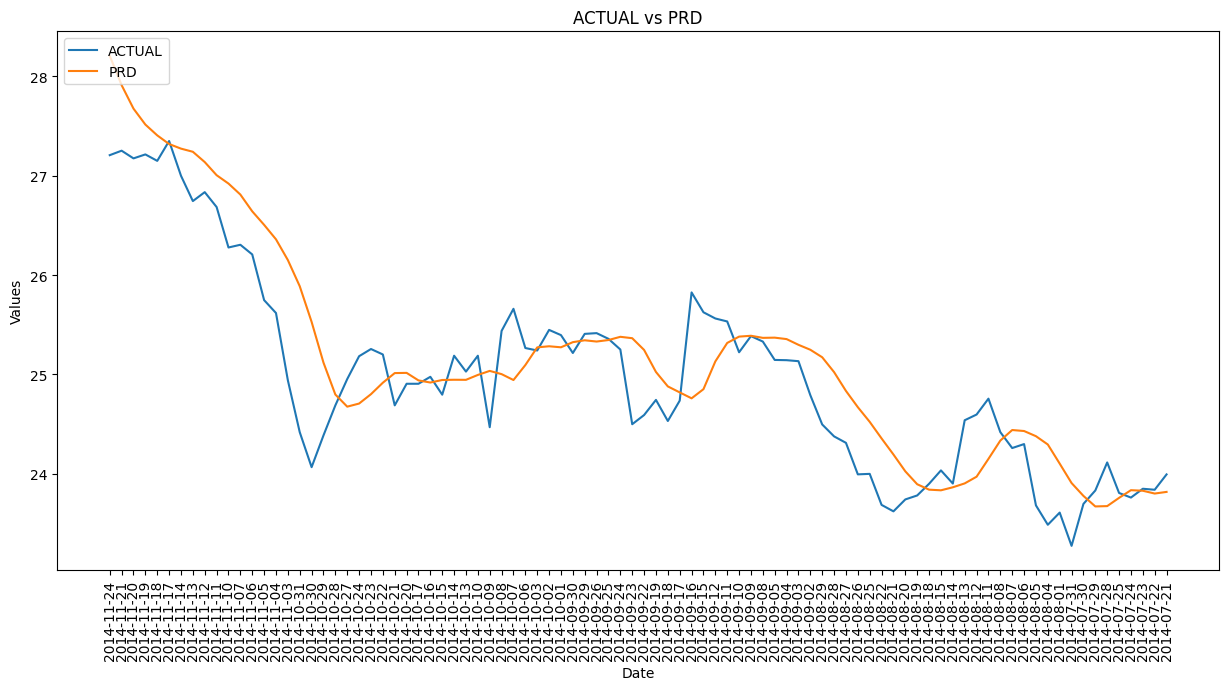

...............................................................................
              RNN using the Optimizer  rmsprop
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4361.6011
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9395
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 73.3656
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 165.1511
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 105.9201
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 60.9574
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.7938
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35.5055
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.7550
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 65.1485
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.2612
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

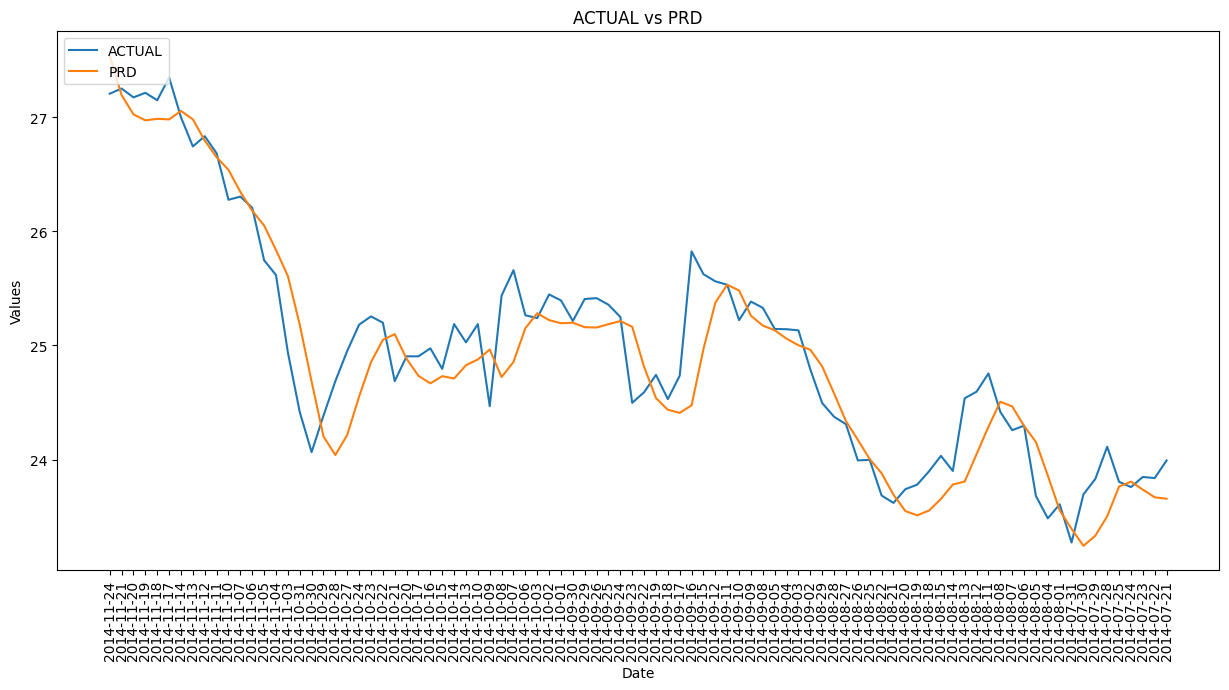

...............................................................................
              RNN using the Optimizer  adamax
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9282.2832
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1238.9048
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 251.2975
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89.8515
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2251
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6175
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5849
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.1797
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4476
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2069
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2510
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.

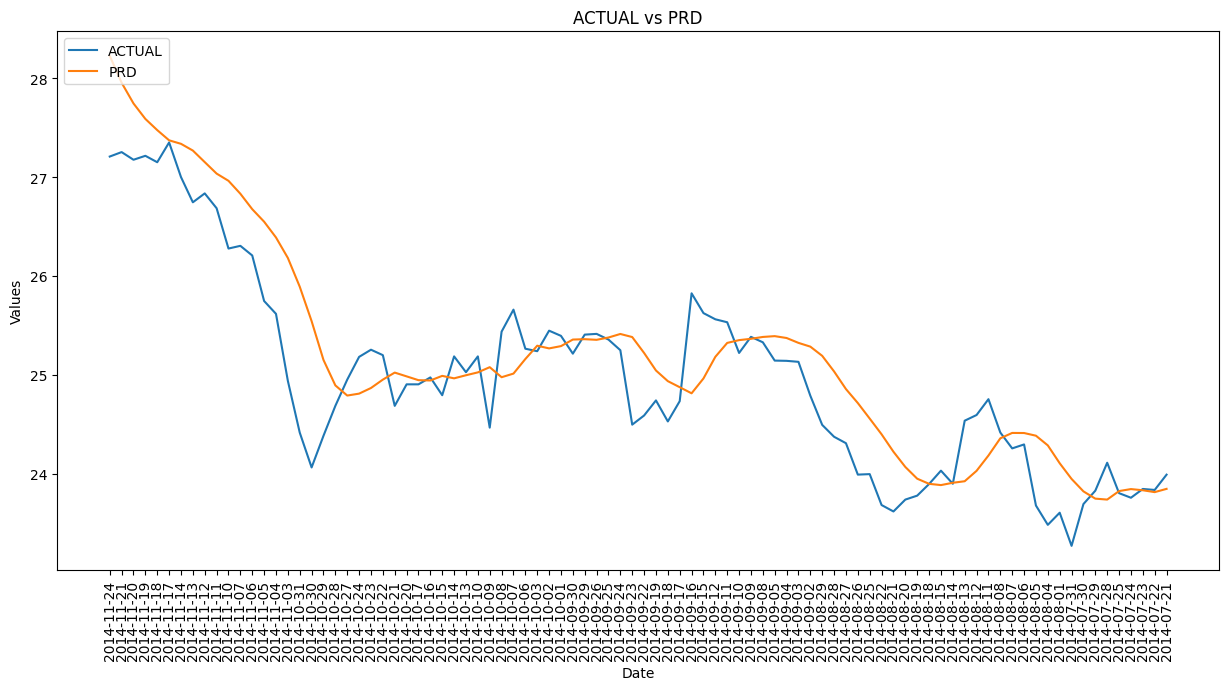

In [ ]:
for apprcd_optmer in ['adam', 'rmsprop', 'adamax']:
  print("...............................................................................")
  print("              RNN using the Optimizer ", apprcd_optmer)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprcsrecnunt(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= apprcd_optmer)
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = 20, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on RNN\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Best optimizer of RNN is - rmsprop**

**RNN (Epochs)**

...............................................................................
              RNN using the Epochs  20
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4261.8491
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.7065
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.7510
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77.1427
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.6675
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88.1185 
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56.5770
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.9998
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.4600
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.4457
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.2374
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40.0682


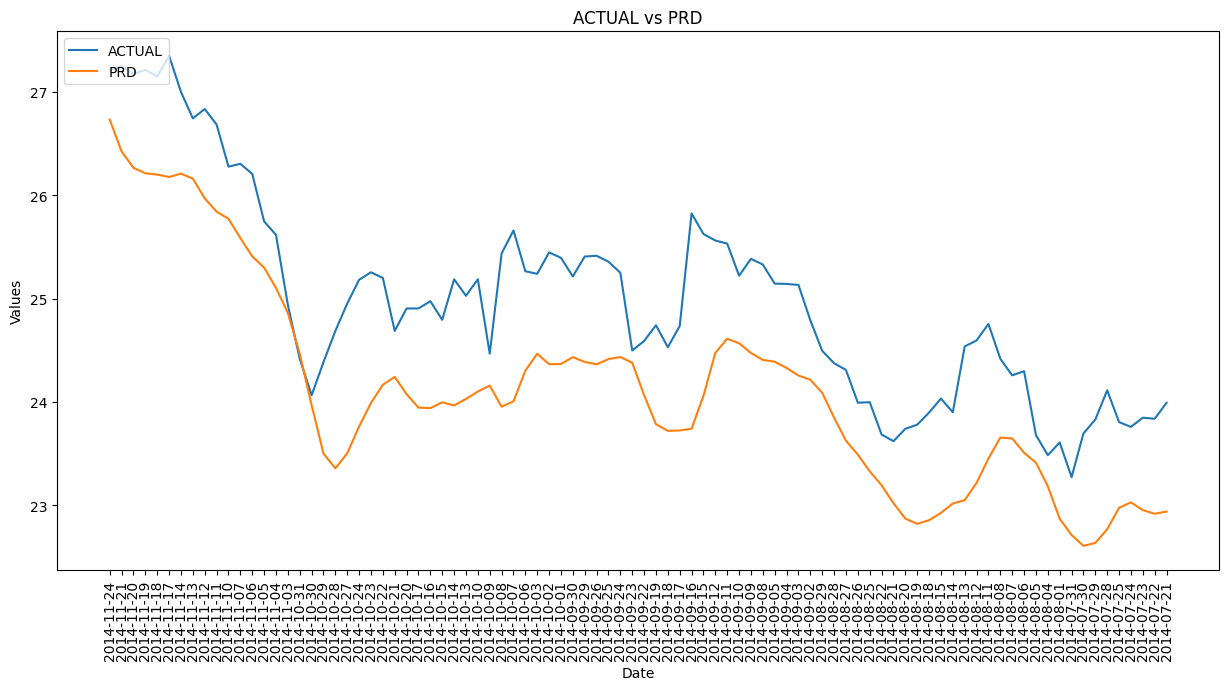

...............................................................................
              RNN using the Epochs  30
...............................................................................

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 364.5541
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.0412
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.2935
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 44.3120
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.9987
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.6056
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.8035
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 29.2399
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 31.1626
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31.7210
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 25.6784
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 

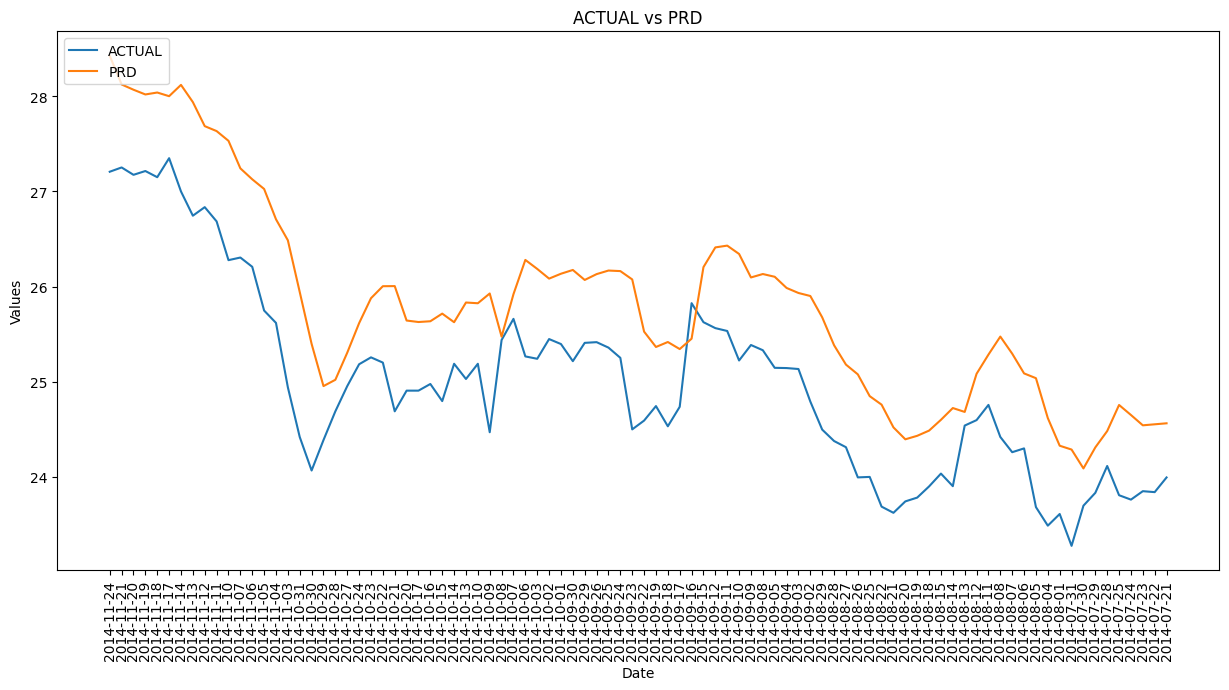

...............................................................................
              RNN using the Epochs  50
...............................................................................

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6568.2119
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 56.5037
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 61.0332
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.6944
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 76.1780
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 86.6344
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.1674
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 90.0560 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 92.6225
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.7619
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.4332
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

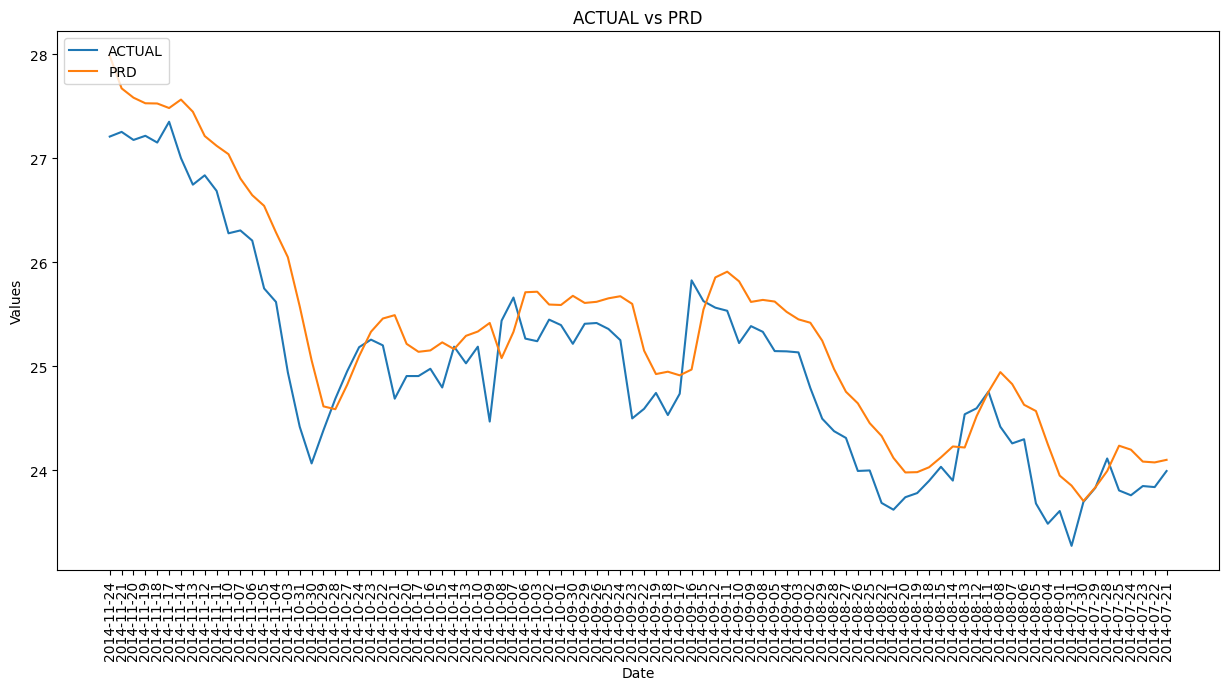

In [ ]:
for apprcd_ephs in [20, 30, 50]:
  print("...............................................................................")
  print("              RNN using the Epochs ", apprcd_ephs)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprcsrecnunt(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))
  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= 'rmsprop')
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = apprcd_ephs, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)
  print("\nEvaluation of Apple Stock on RNN\n")
  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Bidirectional RNN (Optimizers)**

...............................................................................
             Bidirectional RNN using the Optimizer  adam
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 8006.8389
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 510.5943
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 69.6464
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 16.8828
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.7237
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.2502
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.1746
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7267
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.3070
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.7990
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.5924
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/

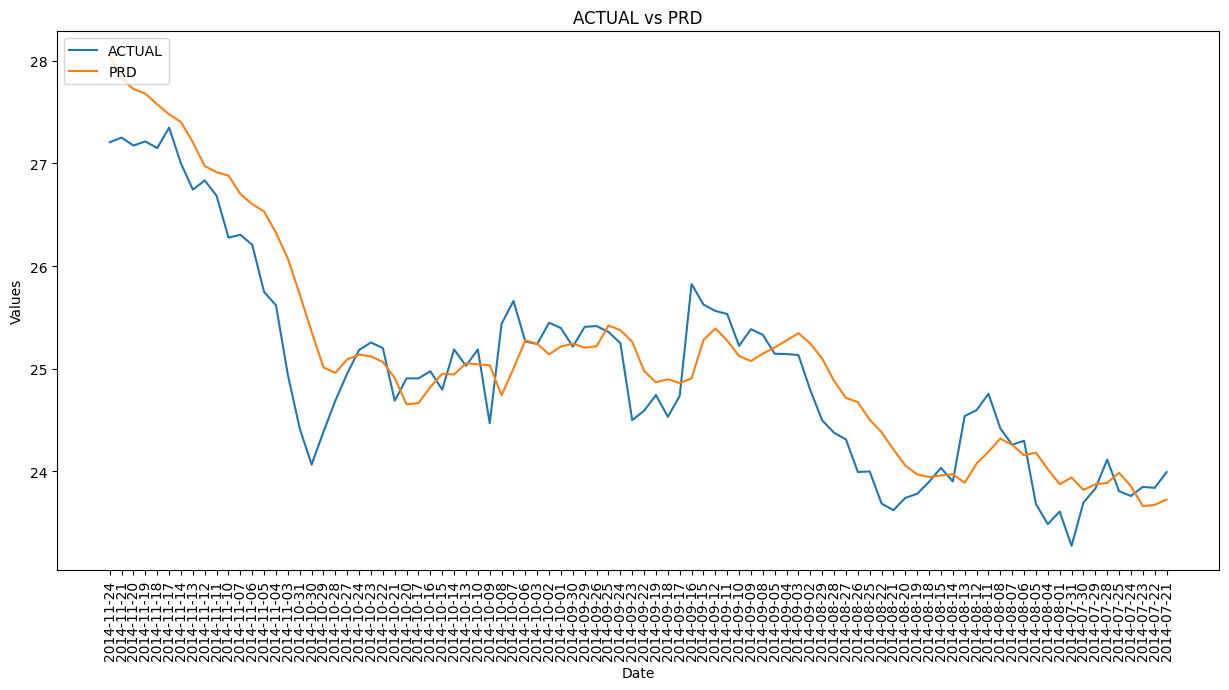

...............................................................................
             Bidirectional RNN using the Optimizer  rmsprop
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4497.1021
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 129.0762
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 70.8612
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 82.9238
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 99.1619
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 115.4649
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 149.5990
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 108.2898
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47.2447
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 35.0314
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 32.0214
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━

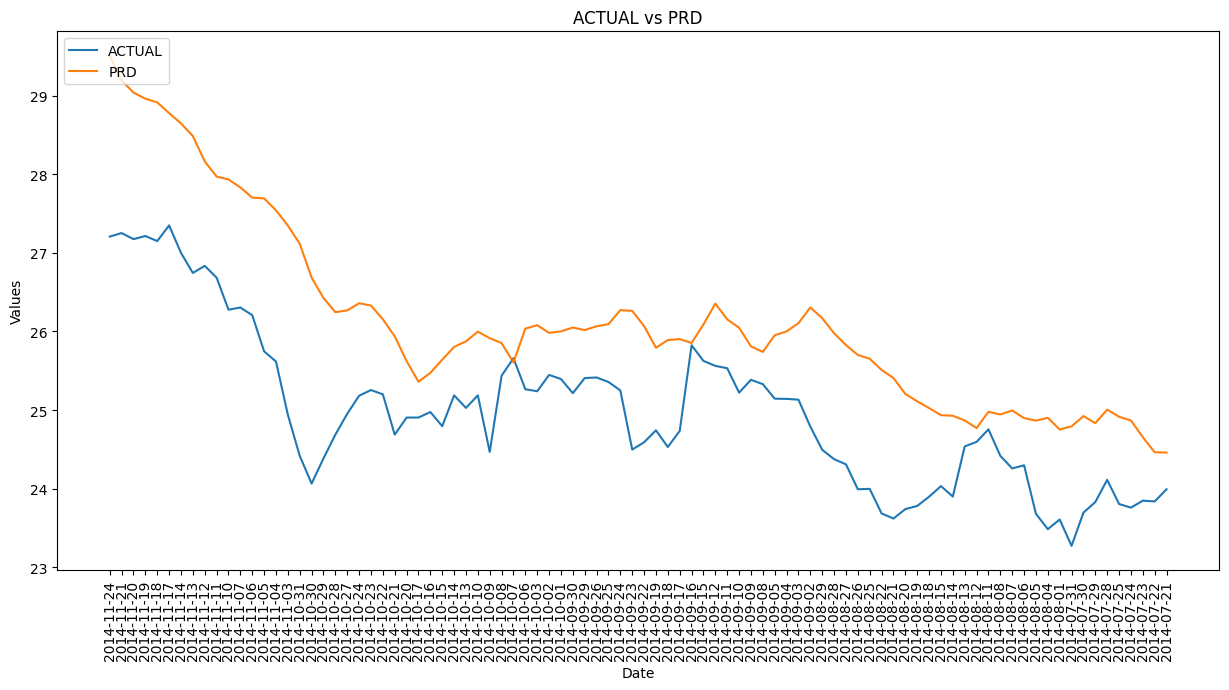

...............................................................................
             Bidirectional RNN using the Optimizer  adamax
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4993.4424
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 351.6490
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 53.2945
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.8619
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11.1479
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.6651
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8.9611
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.2287
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 9.0867
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.4292
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.7572
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17

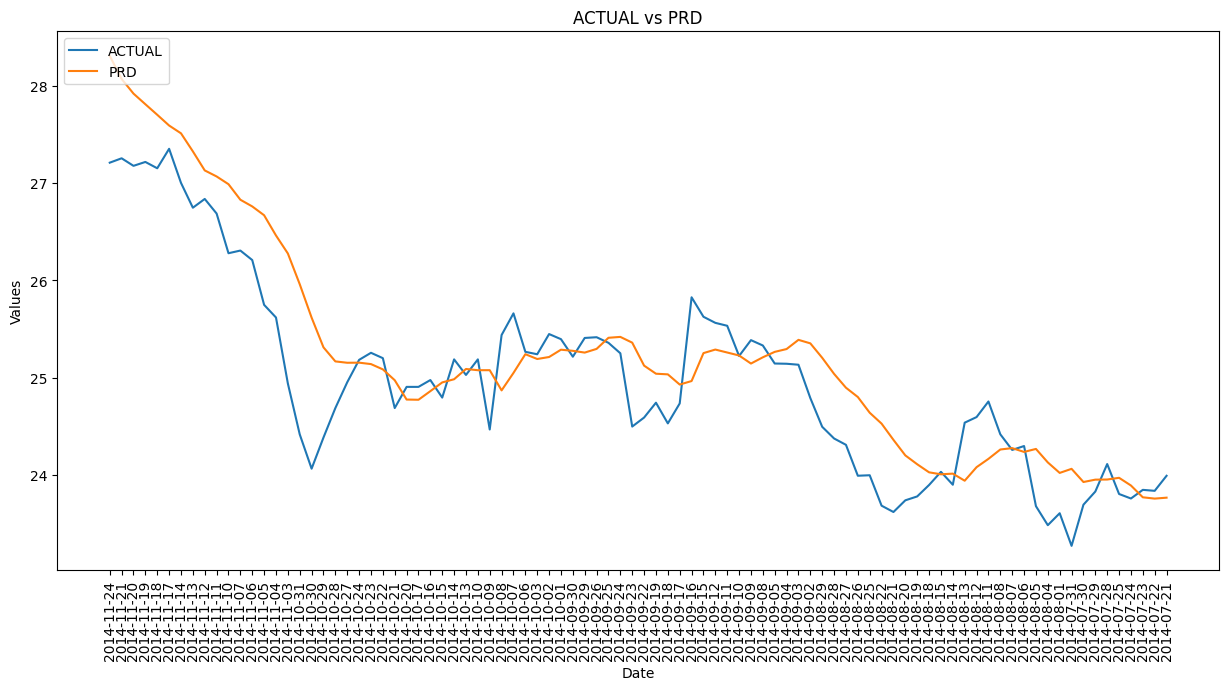

In [ ]:
for apprcd_optmer in ['adam', 'rmsprop', 'adamax']:
  print("...............................................................................")
  print("             Bidirectional RNN using the Optimizer ", apprcd_optmer)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprcdrbidectal(apprcsrecnunt(100, input_shape=(None,1), activation=appr_actvnfct)))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= apprcd_optmer)
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = 20, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on Bidirectional-RNN\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Best optimizer of Bidirectional RNN is - adam**

**Bidirectional RNN (Epochs)**

...............................................................................
             Bidirectional RNN using the Epochs  20
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3450.5527
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 97.1754
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.6168
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.7942
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4073
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9380
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.2379
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.5064
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 8.5996
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 8.3671
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.1274
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step 

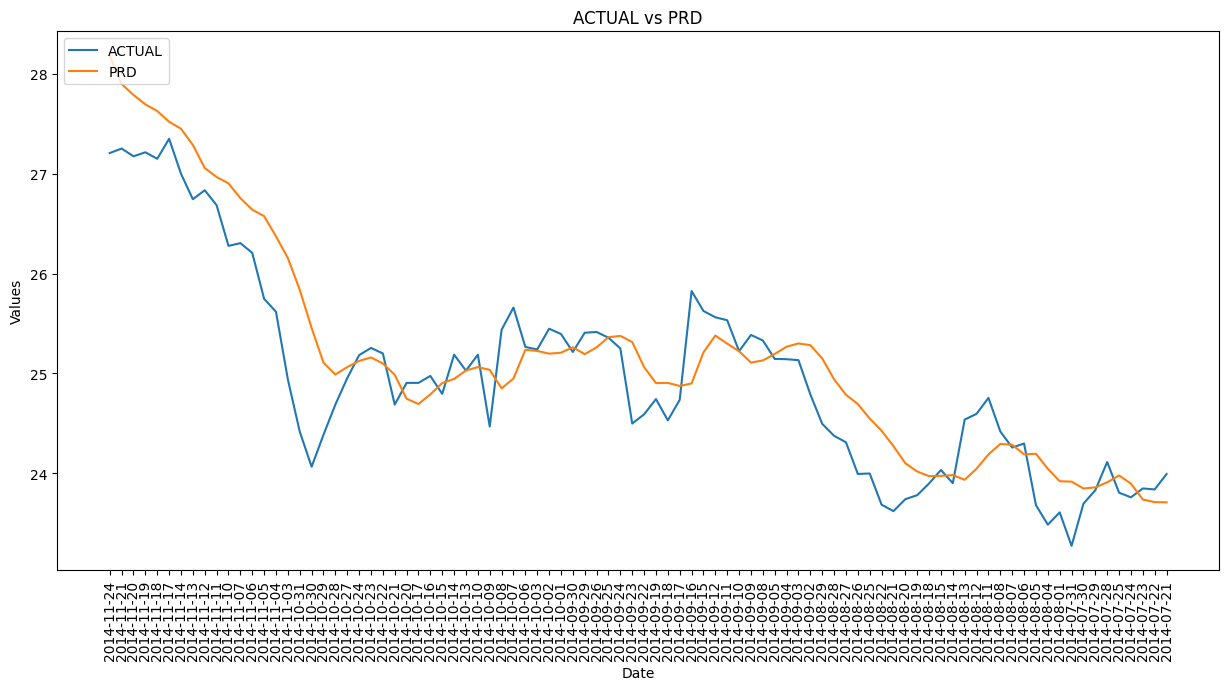

...............................................................................
             Bidirectional RNN using the Epochs  30
...............................................................................

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4561.7559
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 204.3588
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.5954
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8981
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.0823
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.8478
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.9895
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.5180
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.9226
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.2241
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 11.2849
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27m

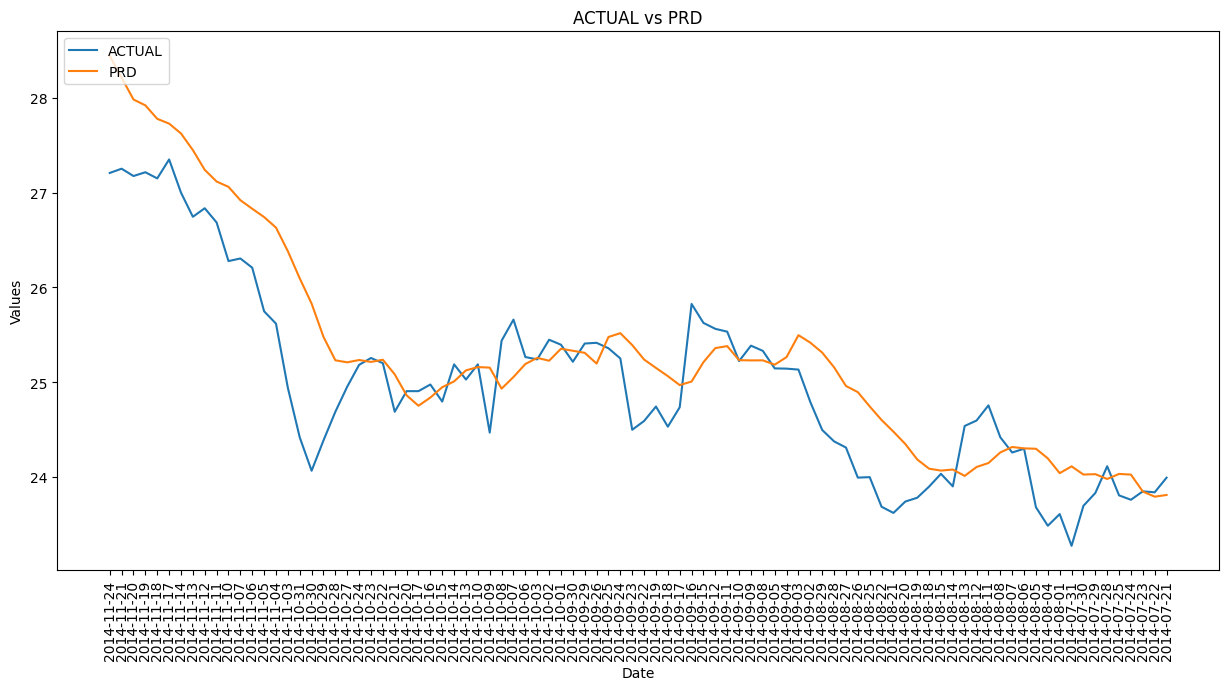

...............................................................................
             Bidirectional RNN using the Epochs  50
...............................................................................

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 9351.2666 
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 637.5865
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 150.6424
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 39.8359
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.6913
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.2058
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.6465
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 11.4595
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 12.0572
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 10.3589
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 11.6818
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3

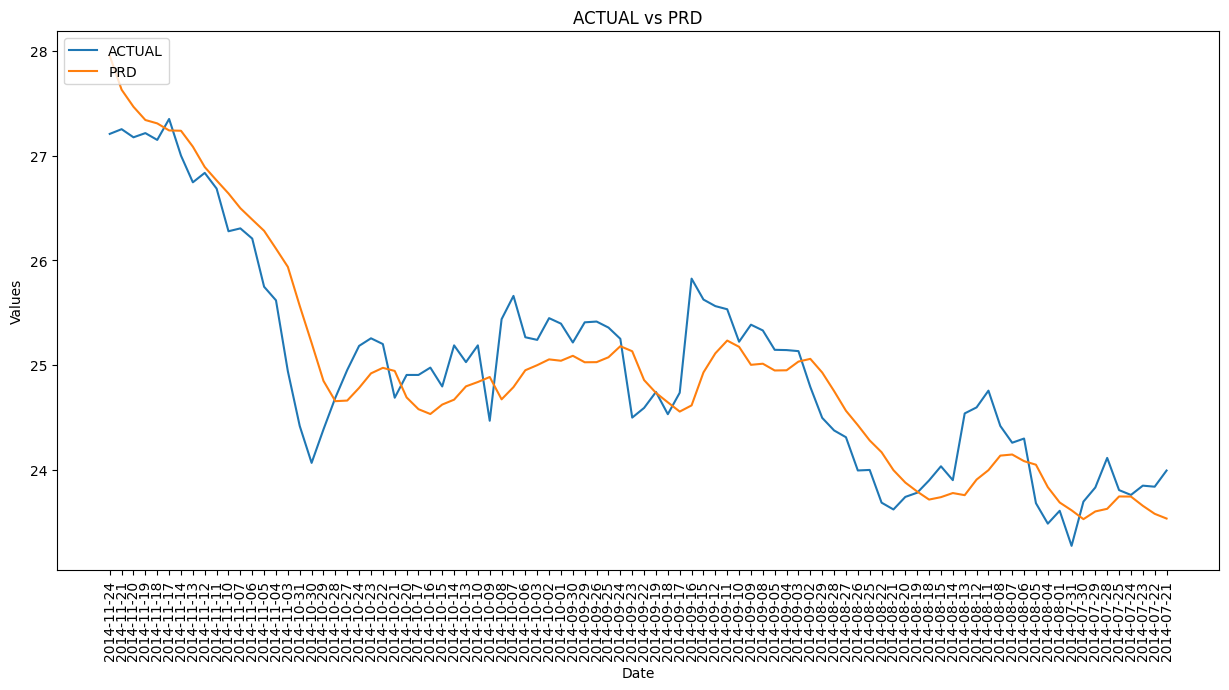

In [ ]:
for apprcd_ephs in [20, 30, 50]:
  print("...............................................................................")
  print("             Bidirectional RNN using the Epochs ", apprcd_ephs)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprcdrbidectal(apprcsrecnunt(100, input_shape=(None,1), activation=appr_actvnfct)))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= 'adam')
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = apprcd_ephs, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on Bidirectional-RNN\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()